<a href="https://colab.research.google.com/github/YvixMiHo/TensorFlow_Developer_Skills/blob/main/NLP_LearningObjectives_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Depenedencies

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, losses
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# 2. Load Enviornment / Data set

In [26]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 45.4MB/s]


## 2.a Make sense of the data, use confusion matrix if necessary

In [27]:
# Define path for file with sonnets
SONNETS_FILE = './sonnets.txt'

# Read the data
with open('./sonnets.txt') as f:
    data = f.read()

# Convert to lower case and save as a list
corpus = data.lower().split("\n")

print(f"There are {len(corpus)} lines of sonnets\n")
print(f"The first 5 lines look like this:\n")
for i in range(5):
  print(corpus[i])

There are 2159 lines of sonnets

The first 5 lines look like this:

from fairest creatures we desire increase,
that thereby beauty's rose might never die,
but as the riper should by time decease,
his tender heir might bear his memory:
but thou, contracted to thine own bright eyes,


In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [29]:
corpus[0]

'from fairest creatures we desire increase,'

In [30]:
tokenizer.texts_to_sequences([corpus[0]])

[[34, 417, 877, 166, 213, 517]]

In [31]:
tokenizer.texts_to_sequences([corpus[0]])[0]

[34, 417, 877, 166, 213, 517]

In [32]:
def n_gram_seqs(corpus, tokenizer):

    input_sequences = []
    
    for line in corpus:
      token_list = tokenizer.texts_to_sequences([line])[0]
      for index in range(1,len(token_list)):
        n_gram = token_list[:index+1]
        input_sequences.append(n_gram)
    
    return input_sequences

## 2.b Validate data shape*

In [33]:
# Test your function with one example
first_example_sequence = n_gram_seqs([corpus[0]], tokenizer)

print("n_gram sequences for first example look like this:\n")
first_example_sequence

n_gram sequences for first example look like this:



[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517]]

In [34]:
next_3_examples_sequence = n_gram_seqs(corpus[1:4], tokenizer)

print("n_gram sequences for next 3 examples look like this:\n")
next_3_examples_sequence

n_gram sequences for next 3 examples look like this:



[[8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278]]

In [35]:
# Apply the n_gram_seqs transformation to the whole corpus
input_sequences = n_gram_seqs(corpus, tokenizer)

# Save max length 
max_sequence_len = max([len(x) for x in input_sequences])

print(f"n_grams of input_sequences have length: {len(input_sequences)}")
print(f"maximum length of sequences is: {max_sequence_len}")

n_grams of input_sequences have length: 15462
maximum length of sequences is: 11


In [36]:
def pad_seqs(input_sequences, maxlen):

    padded_sequences = pad_sequences(input_sequences,
                                     maxlen=maxlen,
                                     padding="pre")
    
    return padded_sequences

In [37]:
first_padded_seq = pad_seqs(first_example_sequence, len(first_example_sequence))
first_padded_seq

array([[  0,   0,   0,  34, 417],
       [  0,   0,  34, 417, 877],
       [  0,  34, 417, 877, 166],
       [ 34, 417, 877, 166, 213],
       [417, 877, 166, 213, 517]], dtype=int32)

## 2.c Visualize the data

## 2.d* preprocess data

In [38]:
input_sequences = pad_seqs(input_sequences, max_sequence_len)

print(f"padded corpus has shape: {input_sequences.shape}")

padded corpus has shape: (15462, 11)


## 2.e* use data augmentation and dropout

# 3. Create, Train and Fit model

## 3.a* use (pre-trained model)transfer learning if necessary

## 3.b* extract features of pre-trained model

In [39]:
def features_and_labels(input_sequences, total_words):
  
    ### START CODE HERE
    features = input_sequences[:,:-1]
    labels = input_sequences[:,-1]
    one_hot_labels = to_categorical(labels, num_classes=total_words)
    ### END CODE HERE

    return features, one_hot_labels

In [40]:
first_features, first_labels = features_and_labels(first_padded_seq, total_words)

print(f"labels have shape: {first_labels.shape}")
print("\nfeatures look like this:\n")
first_features

labels have shape: (5, 3211)

features look like this:



array([[  0,   0,   0,  34],
       [  0,   0,  34, 417],
       [  0,  34, 417, 877],
       [ 34, 417, 877, 166],
       [417, 877, 166, 213]], dtype=int32)

In [41]:
features, labels = features_and_labels(input_sequences, total_words)

print(f"features have shape: {features.shape}")
print(f"labels have shape: {labels.shape}")

features have shape: (15462, 10)
labels have shape: (15462, 3211)


In [42]:
def create_model(total_words, max_sequence_len):

    embedding_dim = 100

    model = Sequential()
    #model.add(Embedding(total_words, 100, input_length=None))
    model.add(Embedding(total_words, embedding_dim, input_length=max_sequence_len-1)),
    model.add(Bidirectional(tf.keras.layers.LSTM(150))),
    model.add(Dense(total_words,activation="softmax"))

    # Compile the model
    model.compile(loss=losses.CategoricalCrossentropy(),
                  optimizer=optimizers.Adam(lr = 0.001),
                  metrics=['accuracy']) 

    return model

In [43]:
# Get the untrained model
model = create_model(total_words, max_sequence_len)

# Train the model
history = model.fit(features, labels, epochs=50, verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


484/484 [==============================] - 27s 48ms/step - loss: 6.8911 - accuracy: 0.0231
Epoch 2/50
484/484 [==============================] - 24s 50ms/step - loss: 6.4243 - accuracy: 0.0321
Epoch 3/50
484/484 [==============================] - 23s 48ms/step - loss: 6.1853 - accuracy: 0.0402
Epoch 4/50
484/484 [==============================] - 23s 48ms/step - loss: 5.9273 - accuracy: 0.0525
Epoch 5/50
484/484 [==============================] - 23s 48ms/step - loss: 5.6261 - accuracy: 0.0605
Epoch 6/50
484/484 [==============================] - 23s 48ms/step - loss: 5.2649 - accuracy: 0.0771
Epoch 7/50
484/484 [==============================] - 24s 50ms/step - loss: 4.8644 - accuracy: 0.0956
Epoch 8/50
484/484 [==============================] - 23s 48ms/step - loss: 4.4414 - accuracy: 0.1312
Epoch 9/50
484/484 [==============================] - 23s 48ms/step - loss: 4.0107 - accuracy: 0.1866
Epoch 10/50
484/484 [==============================] - 23s 48ms/step - loss: 3.6029 - accurac

## 3.c* match test data to inputshape of neural network

## 3.d* match output data of a neural network to speicifed inputshape for test data

## 3.e* use batch loading of data

## 3.f* use callbacks to trigger the end of training cycles

# 4. Evaluate the model

## 4.a Visualize the model

## 4.b* Plot loss and accuracy of a trained model

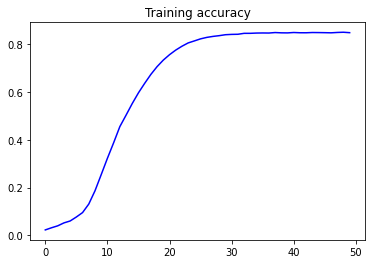

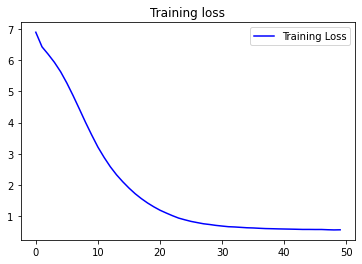

In [44]:
# Take a look at the training curves of your model

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## 4.c* use model to predict results

In [45]:
seed_text = "Together, we will devour the very gods"
next_words = 100
  
for _ in range(next_words):
	# Convert the text into sequences
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	# Pad the sequences
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# Get the probabilities of predicting a word
	predicted = model.predict(token_list, verbose=0)
	# Choose the next word based on the maximum probability
	predicted = np.argmax(predicted, axis=-1).item()
	# Get the actual word from the word index
	output_word = tokenizer.index_word[predicted]
	# Append to the current text
	seed_text += " " + output_word

print(seed_text)

Together, we will devour the very gods birds doth die and prevent make ' am to none told of eye behind of trust men's hate knows it doth part thee 'will ' wrong no hate ' so show me ' do i not love more strong ' can change bright bright glory o wrong in him thee is end to none after art new eyes new told ' still live to more prove thee to me lost it bright in thee ' still in thee art more more eye doth groan to take the fair of thy mind dost lie hid in me old should cannot sing
